# Machine Learning and Deep Learning models for intrusion detction

# IoT Security Network Intrusion Detection

# Step 1: Data Collection (downloading)

# Step 2: Pre-processing

# Step 3: Model Training and Validation

# Data loading and preparation for Training

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)
from sklearn.preprocessing import Normalizer
#import h5py
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

# Load the pre-processed training and test data
traindata = pd.read_csv('dataset-kdd/Training.csv', header=None)
testdata = pd.read_csv('dataset-kdd/Testing.csv', header=None)

## For OMP error
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_test = np.array(C)


X_train = np.array(trainX)
X_test = np.array(testT)

batch_size = 64


Using TensorFlow backend.


# Step 4: Classification Based on Machine Learning algorithms

In [2]:
X_train.shape

(494021, 41)

In [3]:
X_test.shape

(311029, 41)

In [8]:
y_train.shape

(494021,)

In [7]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

C:\Users\moona\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


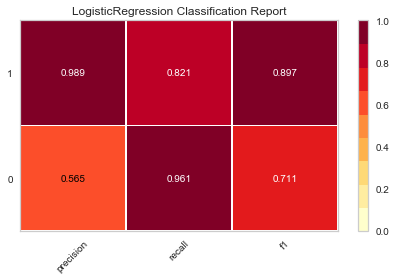

In [10]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

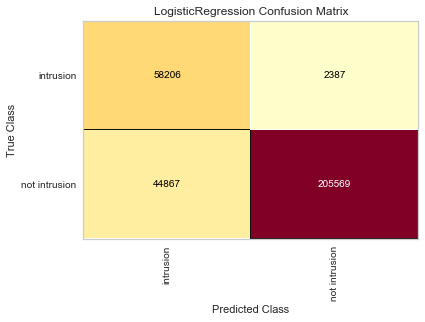

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

classes = ["intrusion","not intrusion"]

model = LogisticRegression(multi_class="auto", solver="liblinear")

iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'intrusion', 1: 'not intrusion'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.poof()

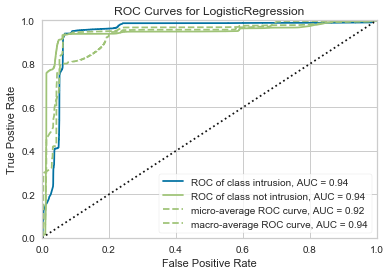

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes = ["intrusion","not intrusion"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

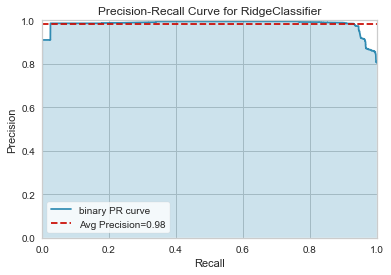

In [14]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

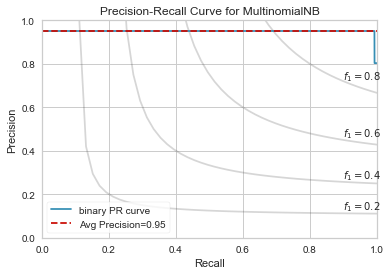

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

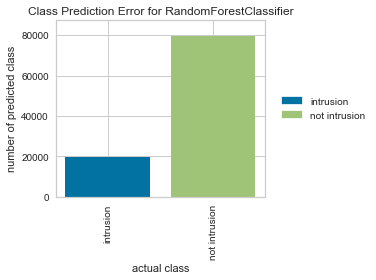

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes = ["intrusion","not intrusion"]

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

# Step 5: Classification Based on deep Learning models

# Model Generation and Training

In [2]:
# Generate or define the netwrok
model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Use tensorboad to log files
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

checkpointer = callbacks.ModelCheckpoint(filepath="dnn-kdd-results/checkpoint-{epoch:02d}.hdf5", 
                                         verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('dnn-kdd-results/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1, callbacks=[checkpointer,csv_logger, tensorboard])
model.save("dnn-kdd-results/dnn_model.hdf5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/Users/raz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
494021/494021 [==============================] - 719s 1ms/step - loss: 0.0137 - acc: 0.9957

Epoch 00001: loss improved from inf to 0.01371, saving model to dnn-kdd-results/checkpoint-01.hdf5


# Performance Evaluation/Validation

----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
[[ 60207    386]
 [ 22920 227516]]


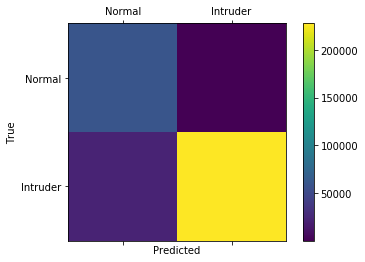

In [3]:
# Validation & Confusion Matrix
score = []
name = []

for file in os.listdir("dnn-kdd-results"):
  model.load_weights("dnn-kdd-results/checkpoint-02.hdf5")
  y_train1 = y_test
  y_pred = model.predict_classes(X_test)
  accuracy = accuracy_score(y_train1, y_pred)
  recall = recall_score(y_train1, y_pred , average="binary")
  precision = precision_score(y_train1, y_pred , average="binary")
  f1 = f1_score(y_train1, y_pred, average="binary")
  print("----------------------------------------------")
  print("accuracy")
  print("%.3f" %accuracy)
  score.append(accuracy)
  name.append(file)


model.load_weights("dnn-kdd-results/"+name[score.index(max(score))])
pred = model.predict_classes(X_test)
proba = model.predict_proba(X_test)
np.savetxt("dnn-kdd-results/dnn4predicted.txt", pred)
np.savetxt("dnn-kdd-results/dnn4probability.txt", proba)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred , average="binary")
precision = precision_score(y_test, pred , average="binary")
f1 = f1_score(y_test, pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)

### Confusion Matrix 
import matplotlib.pylab as plt
# This is to show plot 
%matplotlib inline
matrix = confusion_matrix(y_test, y_pred)
print (matrix)

#Plotting the Confusion Matrix
labels = ['Normal', 'Intruder']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
